<h2 style="text-align: center;"><strong>PF: Mejora de rendimiento: Análisis para transformar el juego</strong></h2>

<h3 style="text-align: left; color: #27CDF2;"><em>EDA y ETL Archivo Draft_Combine_Stats</em></h3>

#### 📌 Importación de librerías

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 📂 Carga de datos

In [ ]:
#Ruta al archivo CSV-Se lo va a llamar game
df_draft_combine_stats = pd.read_csv("../../Data/Data Cruda/draft_combine_stats.csv")

In [228]:
# Mostrar primeras filas en formato tabla
df_draft_combine_stats.head(10)

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2001,2294,Charlie,Bell,Charlie Bell,PG,74.50,6' 2.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2001,2257,Ruben,Boumtje-Boumtje,Ruben Boumtje-Boumtje,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2001,12035,Calvin,Bowman,Calvin Bowman,PF,80.75,6' 8.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2001,2214,Michael,Bradley,Michael Bradley,PF,81.50,6' 9.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2001,2249,Jamison,Brewer,Jamison Brewer,PG,74.50,6' 2.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# Cantidad de filas y columnas
filas, columnas = df_draft_combine_stats.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1202 filas y 47 columnas.


#### 🧹 Limpieza y transformación de datos

In [230]:
df_draft_combine_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1153 non-null   object 
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

In [231]:
# verifico que las columnas con nulos
df_draft_combine_stats.isnull().sum()

season                             0
player_id                          0
first_name                         0
last_name                          0
player_name                        0
position                           5
height_wo_shoes                   49
height_wo_shoes_ft_in             49
height_w_shoes                   194
height_w_shoes_ft_in             194
weight                            50
wingspan                          49
wingspan_ft_in                    49
standing_reach                    50
standing_reach_ft_in              50
body_fat_pct                     199
hand_length                      483
hand_width                       483
standing_vertical_leap           185
max_vertical_leap                185
lane_agility_time                194
modified_lane_agility_time       791
three_quarter_sprint             190
bench_press                      394
spot_fifteen_corner_left        1128
spot_fifteen_break_left         1126
spot_fifteen_top_key            1126
s

In [232]:
# se van a eliminar todas aquellas columnas que tienen m+as de 900 datos nulos, ya que el dataset contiene 1200 filas lo que representa el 75% de la info
# Columnas con más de 900 nulos
nulos = df_draft_combine_stats.isnull().sum()
cols_a_eliminar = nulos[nulos > 900].index.tolist()

print("Columnas a eliminar:")
print(cols_a_eliminar)


Columnas a eliminar:
['spot_fifteen_corner_left', 'spot_fifteen_break_left', 'spot_fifteen_top_key', 'spot_fifteen_break_right', 'spot_fifteen_corner_right', 'spot_college_corner_left', 'spot_college_break_left', 'spot_college_top_key', 'spot_college_break_right', 'spot_college_corner_right', 'spot_nba_corner_left', 'spot_nba_break_left', 'spot_nba_top_key', 'spot_nba_break_right', 'spot_nba_corner_right', 'off_drib_fifteen_break_left', 'off_drib_fifteen_top_key', 'off_drib_fifteen_break_right', 'off_drib_college_break_left', 'off_drib_college_top_key', 'off_drib_college_break_right', 'on_move_fifteen', 'on_move_college']


In [233]:
# Eliminar columnas con más de 900 nulos
df_draft_combine_stats = df_draft_combine_stats.drop(columns=cols_a_eliminar)

In [234]:
# Cantidad de filas y columnas
filas, columnas = df_draft_combine_stats.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1202 filas y 24 columnas.


In [235]:
# verifico las columnas con nulos
df_draft_combine_stats.isnull().sum()

season                          0
player_id                       0
first_name                      0
last_name                       0
player_name                     0
position                        5
height_wo_shoes                49
height_wo_shoes_ft_in          49
height_w_shoes                194
height_w_shoes_ft_in          194
weight                         50
wingspan                       49
wingspan_ft_in                 49
standing_reach                 50
standing_reach_ft_in           50
body_fat_pct                  199
hand_length                   483
hand_width                    483
standing_vertical_leap        185
max_vertical_leap             185
lane_agility_time             194
modified_lane_agility_time    791
three_quarter_sprint          190
bench_press                   394
dtype: int64

In [236]:
# Ver cuántos player_id están duplicados
duplicados = df_draft_combine_stats['player_id'].duplicated().sum()
print(f'Cantidad de IDs duplicados: {duplicados}')

Cantidad de IDs duplicados: 26


In [237]:
# Agrupar por player_id y contar cuántos nombres únicos tiene cada uno
nombres_por_id = (
    df_draft_combine_stats.groupby('player_id')['player_name']
    .nunique()
    .reset_index()
    .rename(columns={'player_name': 'nombre_unico_count'})
)

# Filtrar los casos donde hay más de un nombre distinto por ID
ids_con_conflicto = nombres_por_id[nombres_por_id['nombre_unico_count'] > 1]

print("IDs con más de un nombre distinto:")
print(ids_con_conflicto)


IDs con más de un nombre distinto:
     player_id  nombre_unico_count
0           -1                   3
846    1628968                   2
868    1628992                   2
880    1629004                   2
897    1629023                   2


In [238]:
# Ver nombres asociados a los IDs problemáticos
ids_problema = ids_con_conflicto['player_id'].tolist()
conflictos = df_draft_combine_stats[df_draft_combine_stats['player_id'].isin(ids_problema)][['player_id', 'player_name']].drop_duplicates()

print(conflictos.sort_values('player_id'))


     player_id            player_name
31          -1          Jason Gardner
131         -1          Drago Pasalic
200         -1           Carl Krauser
855    1628968            Brian Bowen
922    1628968         Brian Bowen II
815    1628992   Justin Jackson (UMD)
880    1628992         Justin Jackson
827    1629004         Svi Mykhailiuk
892    1629004  Sviatoslav Mykhailiuk
911    1629023          PJ Washington
985    1629023        P.J. Washington


In [239]:
# Diccionario de reemplazo
nombres_unificados = {
    'Brian Bowen II': 'Brian Bowen',
    'Justin Jackson (UMD)': 'Justin Jackson',
    'Sviatoslav Mykhailiuk': 'Svi Mykhailiuk',
    'P.J. Washington': 'PJ Washington'
}

# Aplicar reemplazo
df_draft_combine_stats['player_name'] = (
    df_draft_combine_stats['player_name']
    .replace(nombres_unificados)
)

In [240]:
# Ver nombres asociados a los IDs problemáticos
ids_problema = ids_con_conflicto['player_id'].tolist()
conflictos = df_draft_combine_stats[df_draft_combine_stats['player_id'].isin(ids_problema)][['player_id', 'player_name']].drop_duplicates()

print(conflictos.sort_values('player_id'))


     player_id     player_name
31          -1   Jason Gardner
131         -1   Drago Pasalic
200         -1    Carl Krauser
855    1628968     Brian Bowen
815    1628992  Justin Jackson
827    1629004  Svi Mykhailiuk
911    1629023   PJ Washington


In [241]:
# Se quitan los jugadores con ID -1 ya que no existen tampoco en la tabla base de jugadores
df_draft_combine_stats = df_draft_combine_stats[df_draft_combine_stats['player_id'] != -1]


In [242]:
# ¿Hay duplicados?
duplicados = df_draft_combine_stats['player_id'].duplicated(keep=False)

# Mostrar cuántos hay
print(f"Cantidad de player_id duplicados: {duplicados.sum()}")


Cantidad de player_id duplicados: 48


In [243]:
# Completar NaN por jugador con valores disponibles del mismo jugador
df_draft_combine_stats_completo = (
    df_draft_combine_stats
    .sort_values(by='season')  # opcional, para priorizar años recientes o más antiguos
    .groupby('player_id', as_index=False)
    .apply(lambda group: group.ffill().bfill())
    .reset_index(drop=True)
)


C:\Users\Paz\AppData\Local\Temp\ipykernel_18928\2226339540.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda group: group.ffill().bfill())
C:\Users\Paz\AppData\Local\Temp\ipykernel_18928\2226339540.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill().bfill())


In [244]:
# Quedarse con una fila por jugador (por ejemplo, la más reciente)
df_draft_combine_stats_final = (
    df_draft_combine_stats_completo
    .sort_values(by='season', ascending=False)
    .drop_duplicates(subset='player_id', keep='first')
    .reset_index(drop=True)
)


In [245]:
# Verificar si hay duplicados en player_id
duplicados = df_draft_combine_stats_final['player_id'].duplicated().sum()
print(f"Número de player_id duplicados: {duplicados}")


Número de player_id duplicados: 0


In [246]:
# verifico las columnas con nulos
df_draft_combine_stats_final.isnull().sum()

season                          0
player_id                       0
first_name                      0
last_name                       0
player_name                     0
position                        4
height_wo_shoes                45
height_wo_shoes_ft_in          45
height_w_shoes                185
height_w_shoes_ft_in          185
weight                         46
wingspan                       45
wingspan_ft_in                 45
standing_reach                 46
standing_reach_ft_in           46
body_fat_pct                  190
hand_length                   476
hand_width                    476
standing_vertical_leap        177
max_vertical_leap             177
lane_agility_time             186
modified_lane_agility_time    777
three_quarter_sprint          182
bench_press                   378
dtype: int64

In [247]:
# Cantidad de filas y columnas
filas, columnas = df_draft_combine_stats_final.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1175 filas y 24 columnas.


In [248]:
# Rellenar la columna posición con la moda general
df_draft_combine_stats_final['position'] = df_draft_combine_stats_final['position'].fillna(df_draft_combine_stats_final['position'].mode()[0])

In [249]:
# Rellenar columnas numéricas importantes con mediana por posición para presevar variabilidad por rol
columnas_por_posicion = [
    'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap', 'max_vertical_leap',
    'lane_agility_time', 'modified_lane_agility_time', 'three_quarter_sprint', 'bench_press', 'height_wo_shoes',
    'height_w_shoes', 'weight', 'wingspan', 'standing_reach'
]

# Imputar por mediana según posición
for col in columnas_por_posicion:
    mediana_por_posicion = df_draft_combine_stats_final.groupby('position')[col].transform('median')
    df_draft_combine_stats_final[col] = df_draft_combine_stats_final[col].fillna(mediana_por_posicion)


In [250]:
# Lista de columnas en formato pies-pulgadas (ft_in) que queremos eliminar
columnas_ft_in = [
    'height_wo_shoes_ft_in',
    'height_w_shoes_ft_in',
    'wingspan_ft_in',
    'standing_reach_ft_in'
]

# Eliminarlas del DataFrame
df_draft_combine_stats_final = df_draft_combine_stats_final.drop(columns=columnas_ft_in)

# Verificación rápida (opcional)
print("Columnas eliminadas:", columnas_ft_in)
print("Columnas restantes:", df_draft_combine_stats_final.columns.tolist())


Columnas eliminadas: ['height_wo_shoes_ft_in', 'height_w_shoes_ft_in', 'wingspan_ft_in', 'standing_reach_ft_in']
Columnas restantes: ['season', 'player_id', 'first_name', 'last_name', 'player_name', 'position', 'height_wo_shoes', 'height_w_shoes', 'weight', 'wingspan', 'standing_reach', 'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap', 'max_vertical_leap', 'lane_agility_time', 'modified_lane_agility_time', 'three_quarter_sprint', 'bench_press']


In [251]:
# Cantidad de filas y columnas
filas, columnas = df_draft_combine_stats_final.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1175 filas y 20 columnas.


In [252]:
# Ver cuántos nulos quedan por columna
df_draft_combine_stats_final.isnull().sum()


season                        0
player_id                     0
first_name                    0
last_name                     0
player_name                   0
position                      0
height_wo_shoes               0
height_w_shoes                0
weight                        0
wingspan                      0
standing_reach                0
body_fat_pct                  0
hand_length                   0
hand_width                    0
standing_vertical_leap        0
max_vertical_leap             0
lane_agility_time             0
modified_lane_agility_time    0
three_quarter_sprint          0
bench_press                   0
dtype: int64

In [ ]:
# Guardar CSV
df_draft_combine_stats_final.to_csv("../../Data/Data Limpia/draft_combine_stats_limpio.csv", index=False)

In [255]:
# Verificar si player_id es único
duplicados = df_draft_combine_stats_final['player_id'].duplicated().sum()

if duplicados == 0:
    print("✅ Todos los player_id son únicos.")
else:
    print(f"⚠️ Hay {duplicados} player_id duplicados.")


✅ Todos los player_id son únicos.


In [256]:
df_draft_combine_stats_final.describe()

,season,player_id,height_wo_shoes,height_w_shoes,weight,wingspan,standing_reach,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press
count,1175.000000,1.175000e+03,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,2012.425532,2.370848e+06,77.611170,78.901064,215.227915,82.528383,103.656511,7.303191,8.730745,9.469149,29.193404,34.566809,11.380711,3.085430,3.282715,10.246809
std,6.545557,5.724906e+07,3.319308,3.289994,25.584795,3.957816,4.859889,2.544696,0.427586,0.594803,2.852397,3.438682,0.548934,0.157343,0.123847,4.502548
min,2001.000000,1.990000e+02,67.750000,69.000000,154.400000,70.000000,89.500000,2.600000,7.500000,7.000000,20.500000,25.000000,9.650000,2.220000,2.910000,0.000000
25%,2007.000000,1.011395e+05,75.250000,76.750000,196.000000,80.000000,100.000000,5.600000,8.500000,9.000000,27.500000,32.500000,11.005000,3.060000,3.200000,8.000000
50%,2012.000000,2.031170e+05,77.750000,79.250000,213.200000,82.750000,104.000000,6.700000,8.750000,9.500000,29.500000,34.500000,11.330000,3.110000,3.270000,10.000000
75%,2018.000000,1.629006e+06,80.000000,81.200000,233.400000,85.250000,107.000000,8.300000,9.000000,9.750000,31.000000,36.500000,11.680000,3.140000,3.360000,12.000000
max,2023.000000,1.962937e+09,89.250000,91.000000,314.000000,98.250000,122.500000,21.000000,10.500000,12.000000,39.500000,45.500000,13.440000,3.760000,3.810000,26.000000


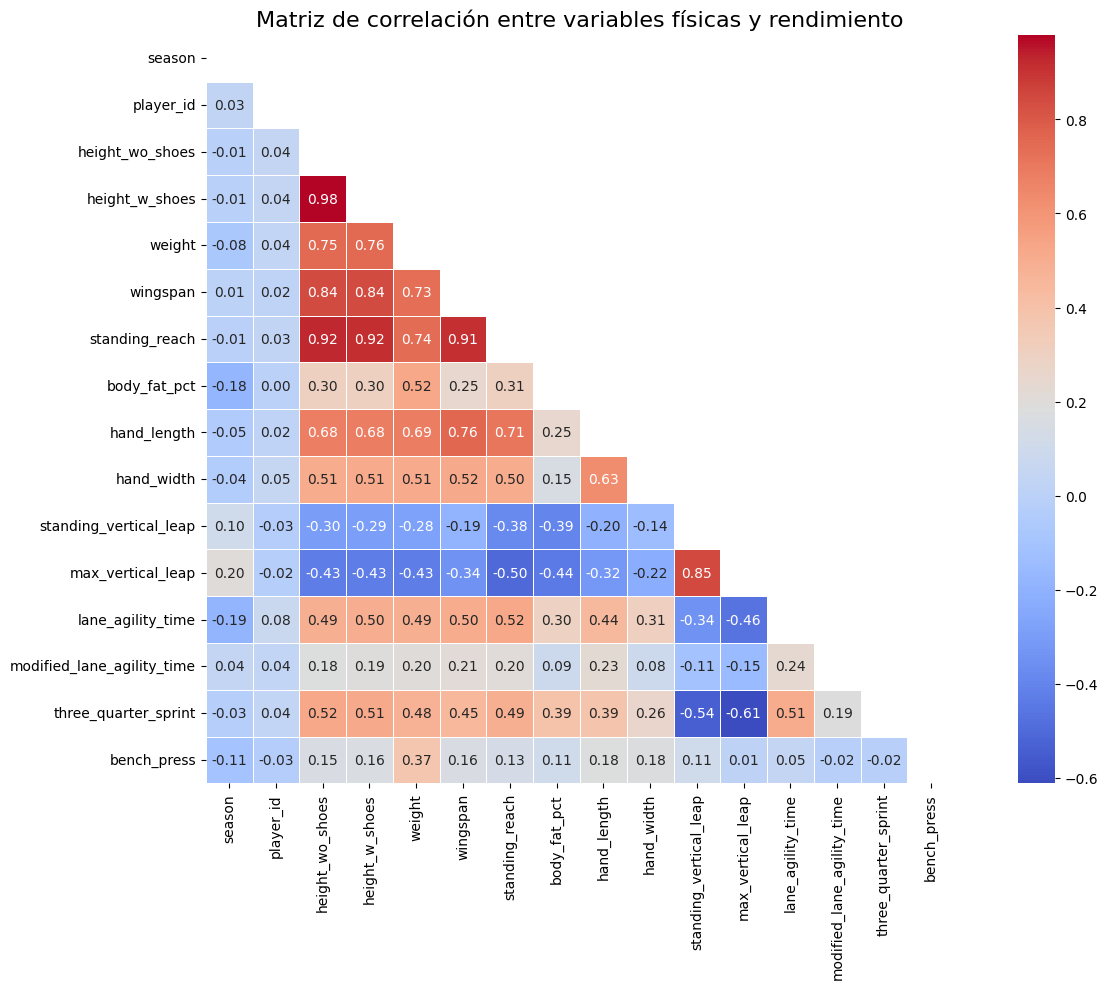

In [260]:
# Seleccionar solo las columnas numéricas del DataFrame limpio
numericas = df_draft_combine_stats_final.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr = numericas.corr()

# Crear una máscara para ocultar la mitad superior del mapa
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 10))

# Dibujar el heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, square=True)

# Título
plt.title('Matriz de correlación entre variables físicas y rendimiento', fontsize=16)
plt.tight_layout()
plt.show()


In [262]:
# Perfiles promedio por posición
df_draft_combine_stats_final.groupby('position')[['height_w_shoes', 'weight', 'wingspan', 'max_vertical_leap']].mean().round(2)


,height_w_shoes,weight,wingspan,max_vertical_leap
position,,,,
C,83.66,250.36,87.85,30.80
C-PF,82.94,240.10,86.46,31.35
PF,81.08,232.95,85.05,33.80
PF-C,82.15,244.59,86.45,33.03
PF-SF,81.00,227.78,84.79,33.09
PG,74.15,186.27,77.26,35.83
PG-SG,75.53,192.42,78.95,35.69
SF,79.72,215.17,83.09,35.16
SF-PF,80.21,220.73,83.98,34.11


In [264]:
# Seleccionamos las columnas físicas y de rendimiento
variables = [
    'height_wo_shoes', 'weight', 'wingspan', 'standing_reach',
    'body_fat_pct', 'hand_length', 'hand_width',
    'standing_vertical_leap', 'max_vertical_leap',
    'lane_agility_time', 'modified_lane_agility_time',
    'three_quarter_sprint', 'bench_press'
]

# Correlación de Pearson entre esas variables
correlation_matrix = df_draft_combine_stats_final[variables].corr()

# Mostrar como tabla ordenando por correlación con el salto vertical máximo, por ejemplo
correlation_sorted = correlation_matrix['max_vertical_leap'].sort_values(ascending=False).to_frame()
print("Correlación con salto vertical máximo:")
print(correlation_sorted)


Correlación con salto vertical máximo:
                            max_vertical_leap
max_vertical_leap                    1.000000
standing_vertical_leap               0.848192
bench_press                          0.011739
modified_lane_agility_time          -0.154008
hand_width                          -0.220545
hand_length                         -0.322202
wingspan                            -0.341106
weight                              -0.428043
height_wo_shoes                     -0.429823
body_fat_pct                        -0.442451
lane_agility_time                   -0.463655
standing_reach                      -0.501287
three_quarter_sprint                -0.611599


In [266]:
# Seleccionamos columnas relevantes
rendimiento = [
    'standing_vertical_leap', 'max_vertical_leap',
    'lane_agility_time', 'three_quarter_sprint'
]

# Calcular correlaciones de 'weight' con esas columnas
correlacion_peso = df_draft_combine_stats_final[['weight'] + rendimiento].corr()

# Mostrar correlación de 'weight' con el resto
print("Correlación entre peso y rendimiento:")
print(correlacion_peso['weight'].drop('weight'))


Correlación entre peso y rendimiento:
standing_vertical_leap   -0.281131
max_vertical_leap        -0.428043
lane_agility_time         0.492908
three_quarter_sprint      0.476367
Name: weight, dtype: float64
